In [64]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.pyplot as plt

In [65]:
IMAGE_SIZE = 32
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 100

In [66]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   'Documents/asl_alphabet_train/asl_alphabet_train',
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)


Found 87000 files belonging to 29 classes.


In [67]:
class_names = dataset.class_names
class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

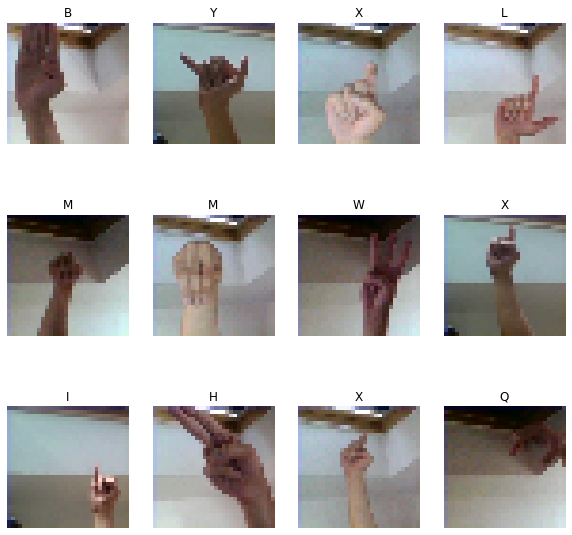

In [68]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [69]:
len(dataset)

2719

In [70]:
train_size = 0.8
len(dataset)*train_size


2175.2000000000003

In [71]:
train_ds = dataset.take(54)
len(train_ds)

54

In [72]:
test_ds = dataset.skip(54)
len(test_ds)

2665

In [73]:
val_size=0.1
len(dataset)*val_size

271.90000000000003

In [74]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [75]:
test_ds = test_ds.skip(6)
len(test_ds)

2659

In [76]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [77]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [78]:
len(train_ds)

2175

In [79]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [80]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [81]:
import tensorflow.keras.models as Models
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential 
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D())
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D())
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(29,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(learning_rate=3e-4),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 200)       5600      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 100)       180100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 50)        45050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 180)              

In [82]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [83]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
2175/2175 [==============================] - 457s 202ms/step - loss: 1.4808 - accuracy: 0.5827 - val_loss: 0.3264 - val_accuracy: 0.8968
Epoch 2/20
2175/2175 [==============================] - 510s 234ms/step - loss: 0.2128 - accuracy: 0.9309 - val_loss: 0.1238 - val_accuracy: 0.9588
Epoch 3/20
2175/2175 [==============================] - 531s 244ms/step - loss: 0.1319 - accuracy: 0.9589 - val_loss: 0.1042 - val_accuracy: 0.9698
Epoch 4/20
2175/2175 [==============================] - 537s 247ms/step - loss: 0.0963 - accuracy: 0.9715 - val_loss: 0.0995 - val_accuracy: 0.9723
Epoch 5/20
2175/2175 [==============================] - 549s 252ms/step - loss: 0.0844 - accuracy: 0.9759 - val_loss: 0.0831 - val_accuracy: 0.9734
Epoch 6/20
2175/2175 [==============================] - 579s 266ms/step - loss: 0.0756 - accuracy: 0.9787 - val_loss: 0.0438 - val_accuracy: 0.9860
Epoch 7/20
2175/2175 [==============================] - 631s 290ms/step - loss: 0.0745 - accuracy: 0.9797 - val_

In [84]:
model.save("1.h5")

In [25]:
m = tf.keras.models.load_model('1.h5')

In [26]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 200)       5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 100)       180100    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 50)        45050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
dense (Dense)                (None, 180)              

In [27]:
scores = m.evaluate(test_ds)

273/273 [==============================] - 33s 55ms/step - loss: 0.0883 - accuracy: 0.9716


In [28]:
scores

[0.08832196146249771, 0.971611738204956]

first image to predict
actual label: nothing
predicted label: nothing


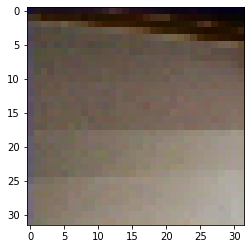

In [29]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = m.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [30]:
import numpy as np
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [34]:
import cv2
import imutils
import numpy as np

# global variables
bg = None
global camera

def run_avg(image, aWeight):
    global bg
    # initialize the background
    if bg is None:
        bg = image.copy().astype("float")
        return

    # compute weighted average, accumulate it and update the background
    cv2.accumulateWeighted(image, bg, aWeight)


def segment(image, threshold=25):
    global bg
    # find the absolute difference between background and current frame
    diff = cv2.absdiff(bg.astype("uint8"), image)

    # threshold the diff image so that we get the foreground
    thresholded = cv2.threshold(diff,
                                threshold,
                                255,
                                cv2.THRESH_BINARY)[1]

    # get the contours in the thresholded image
    (cnts, _) = cv2.findContours(thresholded.copy(),
                                 cv2.RETR_EXTERNAL,
                                 cv2.CHAIN_APPROX_SIMPLE)

    # return None, if no contours detected
    if len(cnts) == 0:
        return
    else:
        # based on contour area, get the maximum contour which is the hand
        segmented = max(cnts, key=cv2.contourArea)
        return (thresholded, segmented)
    import imutils
def main():
    # initialize weight for running average
    aWeight = 0.5

    # get the reference to the webcam
    camera = cv2.VideoCapture(0)

    # region of interest (ROI) coordinates
    top, right, bottom, left = 10, 350, 225, 590

    # initialize num of frames
    num_frames = 0
    image_num = 0
    val = 0

    start_recording = False

    # keep looping, until interrupted
    while(True):
        # get the current frame
        (grabbed, frame) = camera.read()
        if (grabbed == True):

            # resize the frame
            frame = imutils.resize(frame, width=700)

            # flip the frame so that it is not the mirror view
            frame = cv2.flip(frame, 1)

            # clone the frame
            clone = frame.copy()

            # get the height and width of the frame
            (height, width) = frame.shape[:2]

            # get the ROI
            roi = frame[top:bottom, right:left]

            # convert the roi to grayscale and blur it
            gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
            #gray = cv2.GaussianBlur(gray, (7, 7), 0)

            # to get the background, keep looking till a threshold is reached
            # so that our running average model gets calibrated
            if num_frames < 30:
                run_avg(gray, aWeight)
#                 print(num_frames)
            else:
                # segment the hand region
                hand = segment(gray)

                # check whether hand region is segmented
                if hand is not None:
                    # if yes, unpack the thresholded image and
                    # segmented region
                    (thresholded, segmented) = hand

                    # draw the segmented region and display the frame
#                     cv2.drawContours(
#                         clone, [segmented + (right, top)], -1, (0, 0, 255))

                    if start_recording and num_frames%5==0:
                        frame_topredict = cv2.resize(frame, (32, 32)).reshape(1, 32, 32, 3)
                        preds = m.predict(frame_topredict)
                        val = np.argmax(preds[0])
                        print(val)
        
                    cv2.putText(clone, class_names[val], (right, bottom+15), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
                        
                        
                        # Mention the directory in which you wanna store the images followed by the image name
#                         cv2.imwrite("Downloads/Dataset/FistTest/fist_" +
#                                     str(image_num) + '.png', thresholded)
#                         image_num += 1
#                         print(image_num)
#                     cv2.imshow("Thesholded", thresholded)

            # draw the segmented hand
            cv2.rectangle(clone, (left, top), (right, bottom), (0, 255, 0), 2)

            # increment the number of frames
            num_frames += 1

            # display the frame with segmented hand
            cv2.imshow("Video Feed", clone)

            # observe the keypress by the user
            keypress = cv2.waitKey(1) & 0xFF

            # if the user pressed "q", then stop looping
            if keypress == ord("q"):
                break

            if keypress == ord("s"):
                start_recording = True
                num_frames = 0

        else:
            print("[Warning!] Error input, Please check your(camera Or video)")
            break
            
    camera.release()


main()

# free up memory

#videoCaptureObject = cv2.VideoCapture(0)
#result = True
#while(result):
  #  ret,frame = videoCaptureObject.read()
  #  cv2.imwrite("NewPicture.jpg",frame)
   # result = False
#videoCaptureObject.release()
#cv2.destroyAllWindows()
# camera.release()
cv2.destroyAllWindows()


# In[ ]:


import cv2

videoCaptureObject = cv2.VideoCapture(0)
result = True
while(result):
    ret,frame = videoCaptureObject.read()
    cv2.imwrite("NewPicture.jpg",frame)
    result = False
videoCaptureObject.release()
cv2.destroyAllWindows()


# In[ ]:


get_ipython().run_line_magic('pwd', '')


# In[ ]:

28
12
27
27
28
28
28
28
28
28
28
28
10
10
28
10
28
28
28
28
28
27
27
28
28
28
27
28
27
28
27
27
27
27
27
27
27
5
26
26
16
16
16
3
27
16
3


'C:\\Users\\tiyas'